# Partie 3: Feature Engineering et Feature Importance
- #### Affichage sous forme de barplot des Features Importantes 
- #### Expliquer votre selection de feature
### selectionner ma target et mes features avec SelectKBest
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
# Importer SelectKBest and f_classif
from sklearn.feature_selection import SelectKBest,f_classif

In [19]:
# Importer notre nouveau dataset
df = pd.read_csv('./data/new_cancer.csv')
df.head()



,Unnamed: 0,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,0
1,1,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,1
2,2,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,2
3,3,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,2
4,4,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,2


In [20]:
# Drop Unnamed column
df = df.drop('Unnamed: 0',axis=1)
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


In [21]:

X=df.drop(['Level'], axis=1)
y=df['Level']

<AxesSubplot:xlabel='Score', ylabel='Feature'>

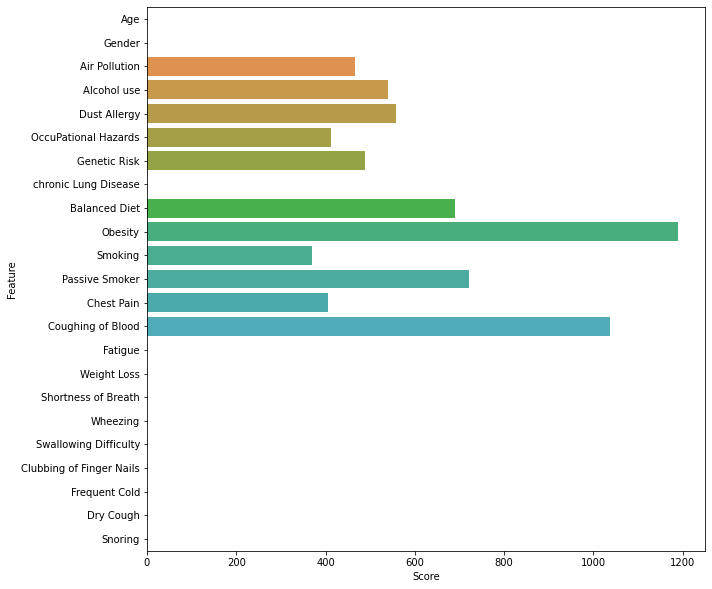

In [22]:
#k="all" c'est pour selectionner toutes les features
featuresHighestScores = SelectKBest(f_classif,k="all")

#Entrainer mes features pour obtenir le score de chaqu'une d'elle 
fit = featuresHighestScores.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)

#Selectionner que les features qui sont supérieur à la moyenne
df_scores_selected = df_scores[lambda x: x > df_scores.mean()]
df_columns = pd.DataFrame(X.columns)


# #concaténer les deux dataframes
df_features = pd.concat([df_columns,df_scores_selected],axis=1)
df_features.columns = ['Feature','Score']


fig, ax=plt.subplots(figsize=(10,10))
plt.xlabel("Score",   color='k')
plt.ylabel("Feature",  color='k')
sns.barplot(data=df_features, x='Score', y='Feature')


### Lors de l'exploration de notre dataset dans le fichier analyseGraphique.ipynb
### nous avons trouvé quelques features plus intéréssantes que d'autres 

#### Maintenant que j'ai les features les plus intérésantes de mon dataset, je vais crée un nouveau dataset qui ne contiendra que ses features pour pouvoir ensuite entrainer un model de prédiction de niveau du cancer

#### Supprimer les features non selectionnées

In [23]:
df_features = df_features.dropna(axis=0)


### Créer un nouveau dataset avec les features selectionnées

In [24]:
features_tab  = list(df_features['Feature'])
features_tab.append('Level')

new_df = df[features_tab]
print('Ancien dataset ',df.shape)
print('Nouveau dataset avec les features les plus intérésantes ',new_df.shape)
print("Mon nouveau dataset contient {} colonnes tandis que l'ancien contenait {}".format(len(list(new_df.columns)),len(list(df.columns))))

Ancien dataset  (1000, 24)
Nouveau dataset avec les features les plus intérésantes  (1000, 12)
Mon nouveau dataset contient 12 colonnes tandis que l'ancien contenait 24


In [25]:
X = new_df.drop('Level',axis=1)
# X = df[["Dust Allergy","OccuPational Hazards","Genetic Risk","Obesity","Coughing of Blood"]]
y = new_df["Level"]

In [26]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

In [27]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)

/home/djila/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [28]:
lsvc.score(X_test,y_test)

0.79

Le score de train set est de 1.0 avec le KNeighborsClassifier model
Le score de Test set est de 1.0 avec le KNeighborsClassifier model
---------------------------------------n_neighbors= 5------------------------------------------

Le score de train set est de 1.0 avec le KNeighborsClassifier model
Le score de Test set est de 1.0 avec le KNeighborsClassifier model
---------------------------------------n_neighbors= 6------------------------------------------

Le score de train set est de 1.0 avec le KNeighborsClassifier model
Le score de Test set est de 1.0 avec le KNeighborsClassifier model
---------------------------------------n_neighbors= 7------------------------------------------

Le score de train set est de 1.0 avec le KNeighborsClassifier model
Le score de Test set est de 1.0 avec le KNeighborsClassifier model
---------------------------------------n_neighbors= 8------------------------------------------

Le score de train set est de 1.0 avec le KNeighborsClassifier model
Le s

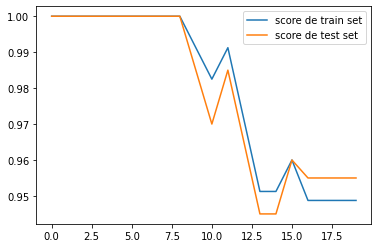

In [30]:
from sklearn.neighbors import KNeighborsClassifier

tab_score_train,tab_score_test = [],[]
for n in range(5,25):
    kn_clf = KNeighborsClassifier(n_neighbors=n)
    kn_clf.fit(X_train,y_train.values.ravel())
    score_train = kn_clf.score(X_train,y_train)
    score_test = kn_clf.score(X_test,y_test)
    print("Le score de train set est de {} avec le KNeighborsClassifier model".format(score_train))
    print("Le score de Test set est de {} avec le KNeighborsClassifier model".format(score_test))
    print("---------------------------------------n_neighbors= {}------------------------------------------\n".format(n))
    tab_score_train.append(score_train)
    tab_score_test.append(score_test)
    

plt.plot(tab_score_train,label= "score de train set")
plt.plot(tab_score_test,label="score de test set")
plt.legend()
plt.show()

### Ici on remarque que en selectionnant les features importantes de notre dataset notre model  a gardé la même précision 

In [31]:
from sklearn.model_selection import GridSearchCV
#j'utilise un dictionnaire contenant les parametres
#nombre de voisin à tester de 1 à 25
#distance euclidean, manhattan ou minkowski 
params = {"n_neighbors": np.arange(5,25),
        "metric":["euclidean","manhattan","minkowski"]}
gscv = GridSearchCV(KNeighborsClassifier(),params,cv=5)
gscv.fit(X_train,y_train.values.ravel())


print('Le model qui a fait le meilleur score ',gscv.best_score_)
print("Les meilleurs paramettres qui ont fait que ce model est le meilleur sont : ",gscv.best_params_)

Le model qui a fait le meilleur score  1.0
Les meilleurs paramettres qui ont fait que ce model est le meilleur sont :  {'metric': 'euclidean', 'n_neighbors': 5}


Voilà pour les features seléctionné grâce au **SelectKBest** j'optiens un score de 100% aussi mais cette fois ci avec la  **métric Euclidean**, rapplons nous que dans la partie 2 de ce projet c'est la  **metric Manhattan** qui avait les meilleurs performances.

# Conclusion
Après avoir tester plusieurs algos de **classification** et jouer avec les **hypers paramettres** tout en faisant un **preprocessing** de mon dataset et en utilisant **GridSearchCV** et la **crossValidation** pour avoir un modèle avec une meilleur performances pour prédire le niveau de cancer chez un patient, je conclu que le meilleur algo pour mon probléme de classification est le **KNeighborsClassifier** avec un nombre de voisin **n_neighbors** de 5.
Je pense aussi que la qualité de mon **dataset** était meilleur néanmoins le **nombre de point** de mon dataset était de 1000 lignes mais ne m'a pas empêché d'entrainer mon modèle et obtenir des bons scores, cela me laisse penser aussi que si je passe plus de données à mon modèle, est ce qu'il restera aussi efficace?